# Simple preprocessing method

**Table of contents**
1. [Import libraries](#import-libraries)
2. [Data preparation](#data-preparation)
3. [Data preprocessing](#data-preprocessing)
4. [Setup for the model assessment](#setup)
5. [Model training and evaluation](#training-evaluation)

<a name="import-libraries-"></a>
## 1.Import libraries

In [1]:
import numpy as np 
import pandas as pd
import os
from tabulate import tabulate
import time

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.family'] = 'monospace'

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_validate, learning_curve, validation_curve, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, make_scorer
from sklearn.utils import shuffle
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

<a name="data-preparation"></a>
## 2. Data preparation

In [2]:
data = [
    ["Age", "Years old"],
    ["Height", "Height (meter)"],
    ["Weight", "Weight (kilogram)"],
    ["FAVC", "Frequent consumption of high caloric food"],
    ["FCVC", "Frequency of consumption of vegetables (frequency)"],
    ["NCP", "Number of main meals (number)"],
    ["CAEC", "Consumption of food between meals"],
    ["CH20", "Consumption of water daily (liter)"],
    ["CALC", "Consumption of alcohol (frequency)"],
    ["SCC", "Calories consumption monitoring"],
    ["FAF", "Physical activity frequency (day/week)"],
    ["TUE", "Time using technology devices (hour/day)"],
    ["MTRANS", "Transportation used "]
]
headers = ["Abbreviation", "Full Form and Unit of Measurement"]

table = tabulate(data, headers, tablefmt="pipe")
print(table)

| Abbreviation   | Full Form and Unit of Measurement                  |
|:---------------|:---------------------------------------------------|
| Age            | Years old                                          |
| Height         | Height (meter)                                     |
| Weight         | Weight (kilogram)                                  |
| FAVC           | Frequent consumption of high caloric food          |
| FCVC           | Frequency of consumption of vegetables (frequency) |
| NCP            | Number of main meals (number)                      |
| CAEC           | Consumption of food between meals                  |
| CH20           | Consumption of water daily (liter)                 |
| CALC           | Consumption of alcohol (frequency)                 |
| SCC            | Calories consumption monitoring                    |
| FAF            | Physical activity frequency (day/week)             |
| TUE            | Time using technology devices (hour/day)     

In [3]:
df = pd.read_csv('../data/ObesityDataSet.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in df.columns if df[cname].dtype == "object"]

# Printing numerical and categorical column lists
print('Numerical Columns: ', numerical_cols)
print('Categorical Columns: ', categorical_cols)

Numerical Columns:  ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical Columns:  ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


In [7]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Check for duplicates

In [8]:
df.duplicated().sum()

24

In [9]:
# drop duplicate
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

In [10]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

<a name="datapreprocessing-"></a>
## 3. Data preprocessing
In this part, we try to ony use the label encoder for the data preprocessing

**Input**: The dataset

**Output**: The dataset `df_copy` (without target labels), the target labels `y`

In [11]:
def simple_data_preprocessing(raw: pd.DataFrame):
    '''
    Simple data processing without thinking about data relationship too much
    '''
    le = LabelEncoder()
    df_copy = raw.copy()
    label_mappings = {
        "Gender": {"Male": 1, "Female": 0},
        "family_history_with_overweight": {"yes": 1, "no": 0},
        "FAVC": {"yes": 1, "no": 0},
        "CAEC": {"Always": 0, "Frequently": 1, "Sometimes": 2, "no": 3},
        "SMOKE": {"yes": 1, "no": 0},
        "SCC": {"yes": 1, "no": 0},
        "CALC": {"Always": 0, "Frequently": 1, "Sometimes": 2, "no": 3},
        "MTRANS": {"Automobile": 0, "Bike": 1, "Motorbike": 2, "Public_Transportation": 3, "Walking": 4}
    }
    y = df_copy['NObeyesdad']
    df_copy.drop(columns='NObeyesdad', inplace=True)
    
    for col in df_copy.columns:
        if df_copy[col].dtype == 'object':
            df_copy[col] = df_copy[col].map(label_mappings.get(col, df_copy[col]))
    
    return df_copy, y

In [12]:
def simple_data_preprocessing_testing(raw: pd.DataFrame):
    df_copy = raw.copy()
    label_mappings = {
        "Gender": {"Male": 1, "Female": 0},
        "family_history_with_overweight": {"yes": 1, "no": 0},
        "FAVC": {"yes": 1, "no": 0},
        "CAEC": {"Always": 0, "Frequently": 1, "Sometimes": 2, "no": 3},
        "SMOKE": {"yes": 1, "no": 0},
        "SCC": {"yes": 1, "no": 0},
        "CALC": {"Always": 0, "Frequently": 1, "Sometimes": 2, "no": 3},
        "MTRANS": {"Automobile": 0, "Bike": 1, "Motorbike": 2, "Public_Transportation": 3, "Walking": 4}
    }
    
    for col in df_copy.columns:
        if df_copy[col].dtype == 'object':
            df_copy[col] = df_copy[col].map(label_mappings.get(col, df_copy[col]))
    
    return df_copy

In [13]:
X, y = simple_data_preprocessing(df)

### Output of data preprocessing function

In [14]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3
2083,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3
2084,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3
2085,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3


In [15]:
y

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2082       Obesity_Type_III
2083       Obesity_Type_III
2084       Obesity_Type_III
2085       Obesity_Type_III
2086       Obesity_Type_III
Name: NObeyesdad, Length: 2087, dtype: object

In [16]:
X.shape, y.shape

((2087, 16), (2087,))

<a name="setup"></a>
## 4. Setup for the model assessment 
- Evaluation metrics: `accuracy`, `f1_score`
- Random state = 1000
- Learning curve

In [17]:
RANDOM_STATE = 42

def my_accuracy_score(y_true, y_pred):
  return accuracy_score(y_true, y_pred)

def my_f1_score(y_true, y_pred):
  return f1_score(y_true, y_pred, average='weighted')

accuracy_scorer = make_scorer(my_accuracy_score, greater_is_better=True)
f1_scorer = make_scorer(my_f1_score, greater_is_better=True)

def feature_importance(model, X, y): # for ensemble learning model
  model.fit(X, y)
  feature_importance = model.feature_importances_
  feature_importance_df = pd.DataFrame(feature_importance, index=X.columns, columns=['Importances'])
  return feature_importance_df.sort_values(by=['Importances'], ascending=False)

def permutation_importance_model(model, X, y): # for linear classification model 
  model.fit(X, y)
  model_fi = permutation_importance(model, X, y)
  model_fi_df = pd.DataFrame(model_fi, index=X.columns, columns=['importances_mean']) 
  model_fi_df = model_fi_df.rename(columns={'importances_mean': 'Importances'})
  return model_fi_df.sort_values(by=['Importances'], ascending=False)

def plot_learning_curve(train_sizes, train_scores, valid_scores, title = "Learning Curve", y_label = "Accuracy Score"):
  fig, ax = plt.subplots(figsize = (10, 6))
  train_scores = np.abs(train_scores)
  valid_scores = np.abs(valid_scores)
  ax.plot(train_sizes, train_scores.mean(axis = 1), label= 'Training score')
  ax.plot(train_sizes, valid_scores.mean(axis = 1), label = 'Cross-validation score')
  ax.set_xlabel('Traning set size')
  ax.set_xticks(train_sizes)
  ax.set_ylabel(y_label)
  ax.set_title(title)
  ax.legend()
  plt.show()
  
def plot_validation_curve(train_scores, valid_scores, param_name, param_range, y_label = "Accuracy score"):
  fig, ax = plt.subplots(figsize= (8, 7))
  train_scores = np.abs(train_scores)
  valid_scores = np.abs(valid_scores)
  ax.plot(param_range, train_scores.mean(axis = 1), label = 'Training score')
  ax.plot(param_range, valid_scores.mean(axis = 1), label = 'Cross-validation score')
  ax.set_xlabel(param_name)
  ax.set_ylabel(y_label)
  ax.set_title("Validation Curve for " + param_name )
  ax.set_xticks(param_range)
  ax.legend()
  plt.show()

Dataframe `df_results` for saving the result of different models.

In [18]:
df_results = pd.DataFrame(columns=["Model", "Parameter", "Training accuracy", "Test accuracy", "Evaluation techniques"])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size= 0.2, shuffle=True, stratify=y, random_state=RANDOM_STATE)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1669, 16), (418, 16), (1669,), (418,))

In [21]:
y_train.value_counts()

Obesity_Type_I         281
Obesity_Type_III       259
Obesity_Type_II        237
Overweight_Level_II    232
Normal_Weight          225
Overweight_Level_I     221
Insufficient_Weight    214
Name: NObeyesdad, dtype: int64

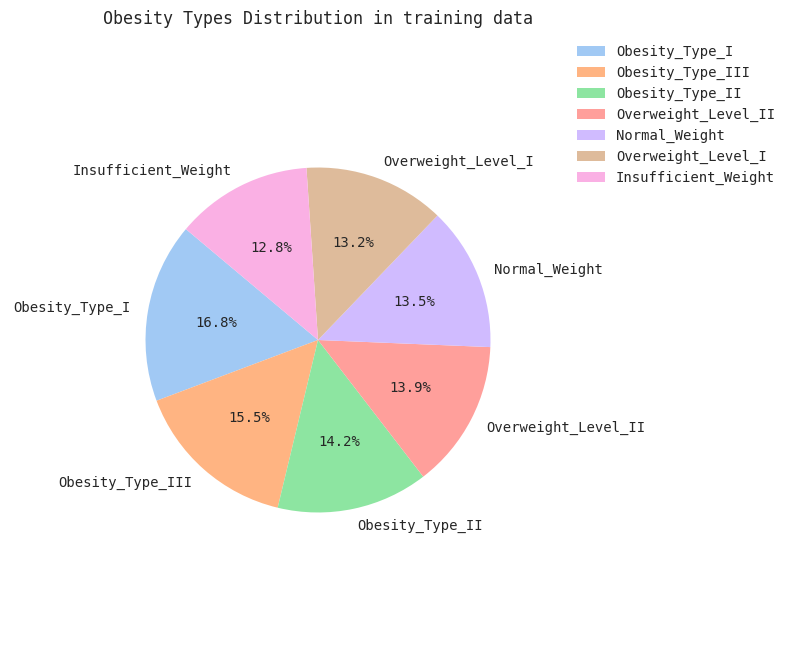

In [22]:
nobeyesdadVC_y_train = y_train.value_counts()
labels = nobeyesdadVC_y_train.index.tolist()
sizes = nobeyesdadVC_y_train.values.tolist()
colors = sns.color_palette('pastel')[0:10]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors= colors, autopct='%1.1f%%', startangle=140, radius=0.7)
plt.legend(loc='upper left', bbox_to_anchor=(0.9, 1))
plt.title('Obesity Types Distribution in training data')

plt.show()

In [23]:
y_test.value_counts()

Obesity_Type_I         70
Obesity_Type_III       65
Obesity_Type_II        60
Overweight_Level_II    58
Normal_Weight          57
Overweight_Level_I     55
Insufficient_Weight    53
Name: NObeyesdad, dtype: int64

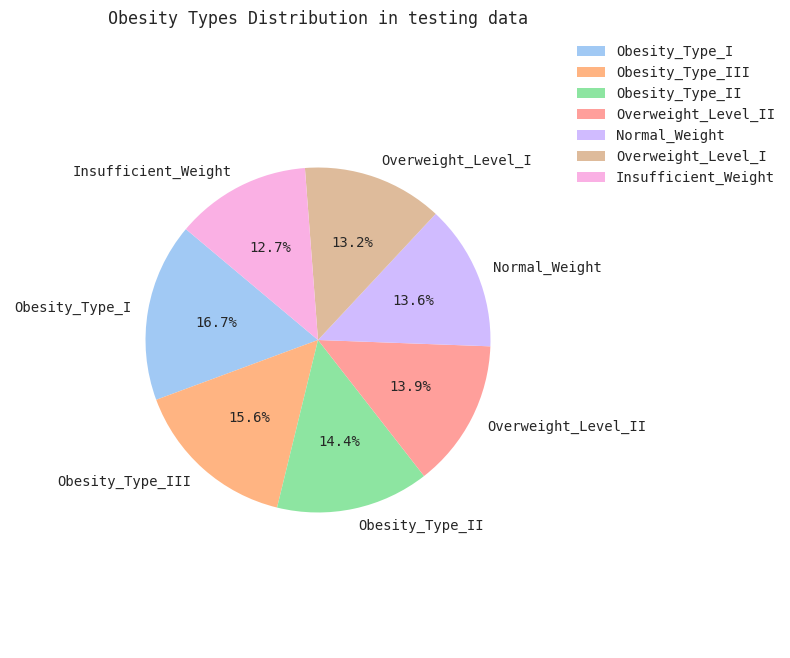

In [24]:
nobeyesdadVC_y_test = y_test.value_counts()
labels = nobeyesdadVC_y_test.index.tolist()
sizes = nobeyesdadVC_y_test.values.tolist()
colors = sns.color_palette('pastel')[0:10]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors= colors, autopct='%1.1f%%', startangle=140, radius=0.7)
plt.legend(loc='upper left', bbox_to_anchor=(0.9, 1))
plt.title('Obesity Types Distribution in testing data')

plt.show()

As we can see, the proportion of each label in training and test label after using `train_test_split` with stratifed sampling is pretty balance.

In [25]:
metrics = {'accuracy': accuracy_scorer, 'f1': f1_scorer}

<a name="training-evaluation"></a>
## 5. Model training and evaluation
- Evaluation technique: *Stratified sampling*
- Baseline model only 

### Logistic Regression

In [26]:
lr = LogisticRegression(max_iter=10000, random_state=RANDOM_STATE)

lr.fit(X_train, y_train)
y_pred_train_lr = lr.predict(X_train)
lr_train_acc = accuracy_score(y_train, y_pred_train_lr)

y_pred_test_lr = lr.predict(X_test)
lr_test_acc = accuracy_score(y_test, y_pred_test_lr)

print("Training Accuracy:", lr_train_acc)
print("Test Accuracy:", lr_test_acc)
print(classification_report(y_test, y_pred_test_lr))

Training Accuracy: 0.8526063511084482
Test Accuracy: 0.8181818181818182
                     precision    recall  f1-score   support

Insufficient_Weight       0.87      0.89      0.88        53
      Normal_Weight       0.76      0.72      0.74        57
     Obesity_Type_I       0.82      0.84      0.83        70
    Obesity_Type_II       0.91      0.98      0.94        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.69      0.67      0.68        55
Overweight_Level_II       0.64      0.60      0.62        58

           accuracy                           0.82       418
          macro avg       0.81      0.81      0.81       418
       weighted avg       0.82      0.82      0.82       418



In [27]:
new_row = pd.DataFrame({"Model": ["Logistic Regression"],
                        "Parameter": ["max_iter = 10000"],
                        "Training accuracy": [0.85],
                        "Test accuracy": [0.82],
                        "Evaluation techniques": ["Stratified sampling"]})

df_results = pd.concat([df_results, new_row], ignore_index=True)

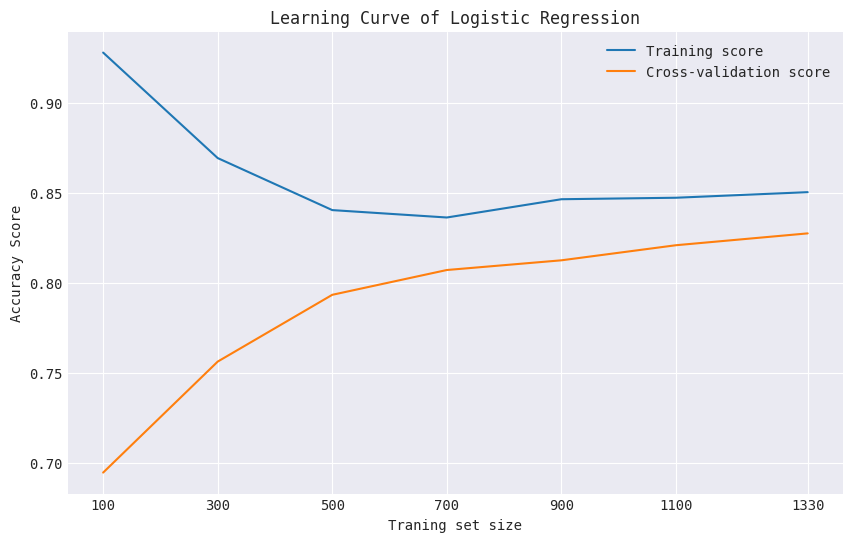

In [28]:
# Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(lr, X_train, y_train, train_sizes=[100, 300, 500, 700, 900, 1100, 1330], scoring = accuracy_scorer)
plot_learning_curve(train_sizes, train_scores, valid_scores, title = "Learning Curve of Logistic Regression", y_label = "Accuracy Score")

#### Predict new instances

In [29]:
temp = pd.DataFrame({
    'Gender': ['Male'], 
    'Age': [17],
    'Height': [1.7],
    'Weight': [70],
    'family_history_with_overweight': ['no'],
    'FAVC': ['yes'],
    'FCVC': [2],
    'NCP': [3],
    'CAEC': ['Sometimes'],
    'SMOKE': ['no'],
    'CH2O': [3],
    'SCC': ['yes'],
    'FAF': [1],
    'TUE': [1],
    'CALC': ['no'],
    'MTRANS': ['Public_Transportation']
})
temp_clean = simple_data_preprocessing_testing(temp)
temp_clean

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,17,1.7,70,0,1,2,3,2,0,3,1,1,1,3,3


In [30]:
temp = pd.DataFrame({
    'Gender': ['Male'],
    'Age': [21],
    'Height': [1.72],
    'Weight': [70],
    'family_history_with_overweight': ['no'],
    'FAVC': ['yes'],
    'FCVC': [2],
    'NCP': [2],
    'CAEC': ['Always'],
    'SMOKE': ['no'],
    'CH2O': [2],
    'SCC': ['no'],
    'FAF': [3],
    'TUE': [12],
    'CALC': ['Sometimes'],
    'MTRANS': ['Motorbike']
})
temp_clean = simple_data_preprocessing_testing(temp)
temp_clean

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,21,1.72,70,0,1,2,2,0,0,2,0,3,12,2,2


In [31]:
lr.predict(temp_clean)

array(['Normal_Weight'], dtype=object)

In [32]:
temp = pd.DataFrame({
    'Gender': ['Female'],
    'Age': [26],
    'Height': [1.62495],
    'Weight': [111.946321],
    'family_history_with_overweight': ['yes'],
    'FAVC': ['yes'],
    'FCVC': [3],
    'NCP': [3],
    'CAEC': ['Sometimes'],
    'SMOKE': ['no'],
    'CH2O': [2.770125],
    'SCC': ['no'],
    'FAF': [0],
    'TUE': [0.09776],
    'CALC': ['Sometimes'],
    'MTRANS': ['Public_Transportation']
})
temp_clean = simple_data_preprocessing_testing(temp)
temp_clean

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,26,1.62495,111.946321,1,1,3,3,2,0,2.770125,0,0,0.09776,2,3


In [33]:
lr.predict(temp_clean)

array(['Obesity_Type_III'], dtype=object)

### Decision tree

In [34]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

dt.fit(X_train, y_train)
y_pred_train_dt = dt.predict(X_train)
dt_train_acc = accuracy_score(y_train, y_pred_train_dt)

y_pred_test_dt = dt.predict(X_test)
dt_test_acc = accuracy_score(y_test, y_pred_test_dt)

print("Training Accuracy:", dt_train_acc)
print("Test Accuracy:", dt_test_acc)
print(classification_report(y_test, y_pred_test_dt))

Training Accuracy: 1.0
Test Accuracy: 0.9258373205741627
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.92      0.95        53
      Normal_Weight       0.83      0.86      0.84        57
     Obesity_Type_I       0.94      0.94      0.94        70
    Obesity_Type_II       0.98      0.98      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.83      0.80      0.81        55
Overweight_Level_II       0.90      0.97      0.93        58

           accuracy                           0.93       418
          macro avg       0.92      0.92      0.92       418
       weighted avg       0.93      0.93      0.93       418



In [35]:
new_row = pd.DataFrame({"Model": ["Decision Tree"],
                        "Parameter": ["None"],
                        "Training accuracy": [1.00],
                        "Test accuracy": [0.93],
                        "Evaluation techniques": ["Stratified sampling"]})

df_results = pd.concat([df_results, new_row], ignore_index=True)

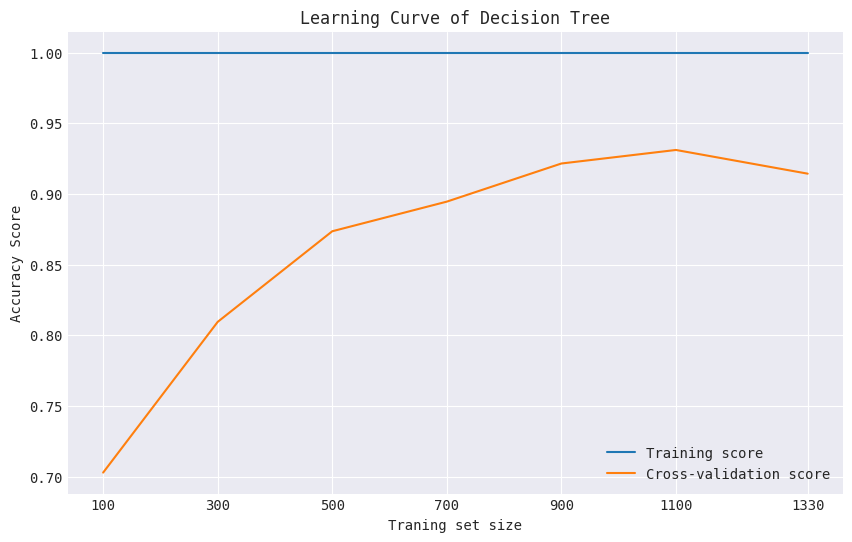

In [36]:
train_sizes, train_scores, valid_scores = learning_curve(dt, X_train, y_train, train_sizes=[100, 300, 500, 700, 900, 1100, 1330], scoring = accuracy_scorer)
plot_learning_curve(train_sizes, train_scores, valid_scores, title = "Learning Curve of Decision Tree", y_label = "Accuracy Score")

Decision Tree tends to be overfitting if we increase the training size.

### Random forest

In [37]:
rf = RandomForestClassifier(random_state=RANDOM_STATE)
rf.fit(X_train, y_train)

y_pred_train_rf = rf.predict(X_train)
rf_train_acc = accuracy_score(y_train, y_pred_train_rf)

y_pred_test_rf = rf.predict(X_test)
rf_test_acc = accuracy_score(y_test, y_pred_test_rf)

print("Training Accuracy:", rf_train_acc)
print("Test Accuracy:", rf_test_acc)
print(classification_report(y_test, y_pred_test_rf))

Training Accuracy: 1.0
Test Accuracy: 0.9545454545454546
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.94      0.97        53
      Normal_Weight       0.84      0.95      0.89        57
     Obesity_Type_I       1.00      0.97      0.99        70
    Obesity_Type_II       0.98      1.00      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.89      0.91      0.90        55
Overweight_Level_II       0.96      0.91      0.94        58

           accuracy                           0.95       418
          macro avg       0.95      0.95      0.95       418
       weighted avg       0.96      0.95      0.96       418



In [38]:
new_row = pd.DataFrame({"Model": ["Random Forest"],
                        "Parameter": ["None"],
                        "Training accuracy": [1.00],
                        "Test accuracy": [0.95],
                        "Evaluation techniques": ["Stratified sampling"]})

df_results = pd.concat([df_results, new_row], ignore_index=True)

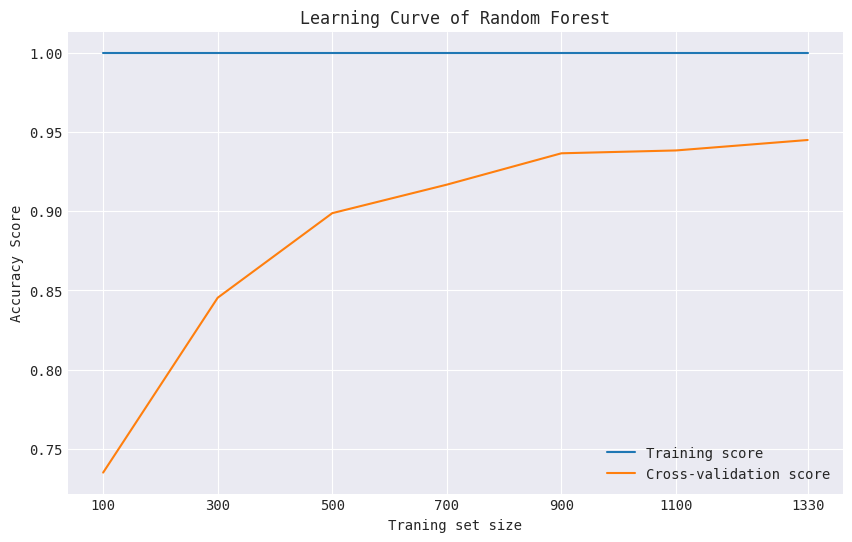

In [39]:
# Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(rf, X_train, y_train, train_sizes=[100, 300, 500, 700, 900, 1100, 1330], scoring = accuracy_scorer)
plot_learning_curve(train_sizes, train_scores, valid_scores, title = "Learning Curve of Random Forest", y_label = "Accuracy Score")

### SVM

In [40]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_train_svc = svc.predict(X_train)
svc_train_acc = accuracy_score(y_train, y_pred_train_svc)

y_pred_test_svc = svc.predict(X_test)
svc_test_acc = accuracy_score(y_test, y_pred_test_svc)

print("Training Accuracy:", svc_train_acc)
print("Test Accuracy:", svc_test_acc)
print(classification_report(y_test, y_pred_test_svc))

Training Accuracy: 0.5380467345715998
Test Accuracy: 0.5263157894736842
                     precision    recall  f1-score   support

Insufficient_Weight       0.74      0.87      0.80        53
      Normal_Weight       0.51      0.37      0.43        57
     Obesity_Type_I       0.36      0.34      0.35        70
    Obesity_Type_II       0.65      0.67      0.66        60
   Obesity_Type_III       0.57      0.49      0.53        65
 Overweight_Level_I       0.45      0.42      0.43        55
Overweight_Level_II       0.43      0.59      0.50        58

           accuracy                           0.53       418
          macro avg       0.53      0.53      0.53       418
       weighted avg       0.52      0.53      0.52       418



In [41]:
new_row = pd.DataFrame({"Model": ["SVM"],
                        "Parameter": ["None"],
                        "Training accuracy": [0.54],
                        "Test accuracy": [0.54],
                        "Evaluation techniques": ["Stratified sampling"]})

df_results = pd.concat([df_results, new_row], ignore_index=True)

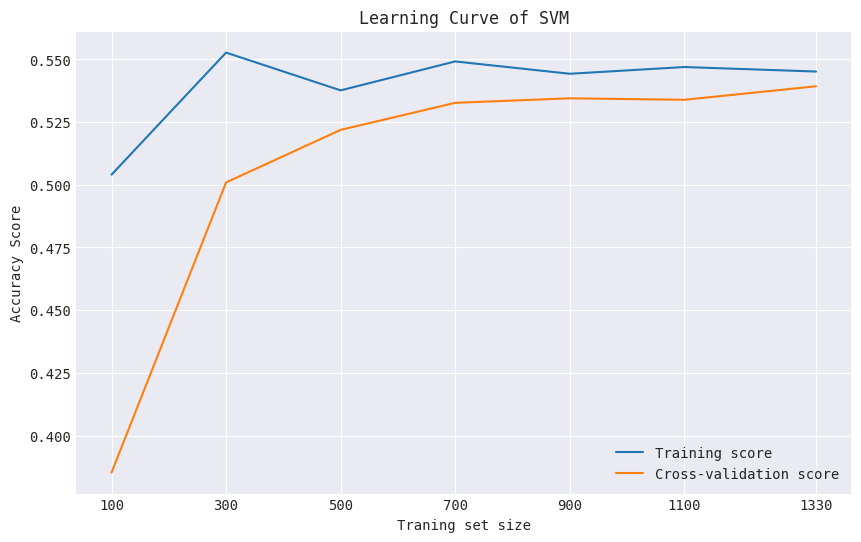

In [42]:
train_sizes, train_scores, valid_scores = learning_curve(svc, X_train, y_train, train_sizes=[100, 300, 500, 700, 900, 1100, 1330], scoring = accuracy_scorer)
plot_learning_curve(train_sizes, train_scores, valid_scores, title = "Learning Curve of SVM", y_label = "Accuracy Score")

### XGBoost

First of all, we need to map our target labels into numeric values.

In [43]:
mapping = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6}
y_train_encode = y_train.map(mapping)
y_test_encode = y_test.map(mapping)

In [44]:
xgbModel = XGBClassifier(random_state=RANDOM_STATE)

xgbModel.fit(X_train, y_train_encode)
y_pred_train_xgb = xgbModel.predict(X_train)
xgb_train_acc = accuracy_score(y_train_encode, y_pred_train_xgb)

y_pred_test_xgb = xgbModel.predict(X_test)
xgb_test_acc = accuracy_score(y_test_encode, y_pred_test_xgb)

print("Training Accuracy:", xgb_train_acc)
print("Test Accuracy:", xgb_test_acc)
print(classification_report(y_test_encode, y_pred_test_xgb))

Training Accuracy: 1.0
Test Accuracy: 0.9688995215311005
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.95      0.93      0.94        57
           2       0.89      0.93      0.91        55
           3       0.97      0.98      0.97        58
           4       1.00      0.96      0.98        70
           5       0.97      1.00      0.98        60
           6       1.00      0.98      0.99        65

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418



In [45]:
new_row = pd.DataFrame({"Model": ["XGBoost"],
                        "Parameter": ["None"],
                        "Training accuracy": [1.00],
                        "Test accuracy": [0.98],
                        "Evaluation techniques": ["Stratified sampling"]})

df_results = pd.concat([df_results, new_row], ignore_index=True)

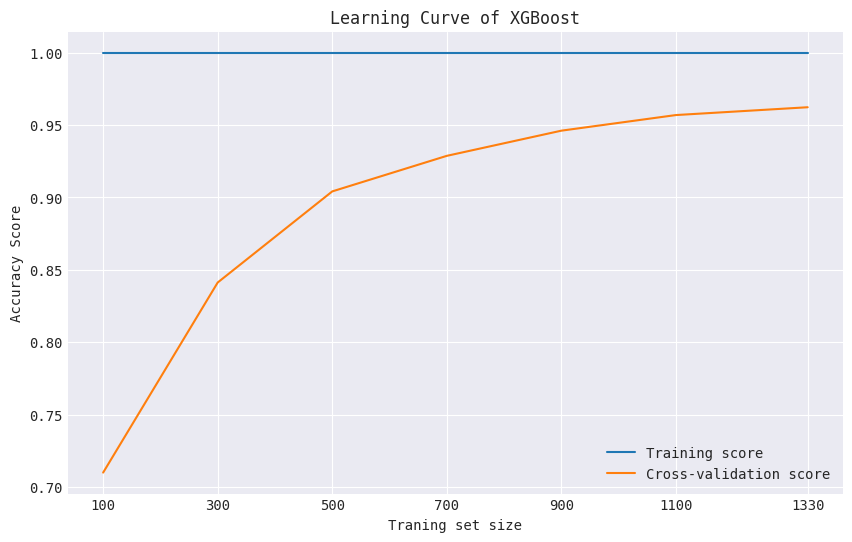

In [46]:
# Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(xgbModel, X_train, y_train_encode, train_sizes=[100, 300, 500, 700, 900, 1100, 1330], scoring = accuracy_scorer)
plot_learning_curve(train_sizes, train_scores, valid_scores, title = "Learning Curve of XGBoost", y_label = "Accuracy Score")

### K-Nearest Neighbors

In [47]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred_train_knn = knn.predict(X_train)
knn_train_acc = accuracy_score(y_train, y_pred_train_knn)

y_pred_test_knn = knn.predict(X_test)
knn_test_acc = accuracy_score(y_test, y_pred_test_knn)

print("Training Accuracy:", knn_train_acc)
print("Test Accuracy:", knn_test_acc)
print(classification_report(y_test, y_pred_test_knn))

Training Accuracy: 0.9107249850209707
Test Accuracy: 0.8947368421052632
                     precision    recall  f1-score   support

Insufficient_Weight       0.87      0.98      0.92        53
      Normal_Weight       0.97      0.58      0.73        57
     Obesity_Type_I       0.93      0.96      0.94        70
    Obesity_Type_II       0.95      1.00      0.98        60
   Obesity_Type_III       1.00      0.97      0.98        65
 Overweight_Level_I       0.74      0.89      0.81        55
Overweight_Level_II       0.83      0.86      0.85        58

           accuracy                           0.89       418
          macro avg       0.90      0.89      0.89       418
       weighted avg       0.90      0.89      0.89       418



In [48]:
new_row = pd.DataFrame({"Model": ["K-Nearest Neighbors"],
                        "Parameter": ["None"],
                        "Training accuracy": [0.91],
                        "Test accuracy": [0.89],
                        "Evaluation techniques": ["Stratified sampling"]})

df_results = pd.concat([df_results, new_row], ignore_index=True)

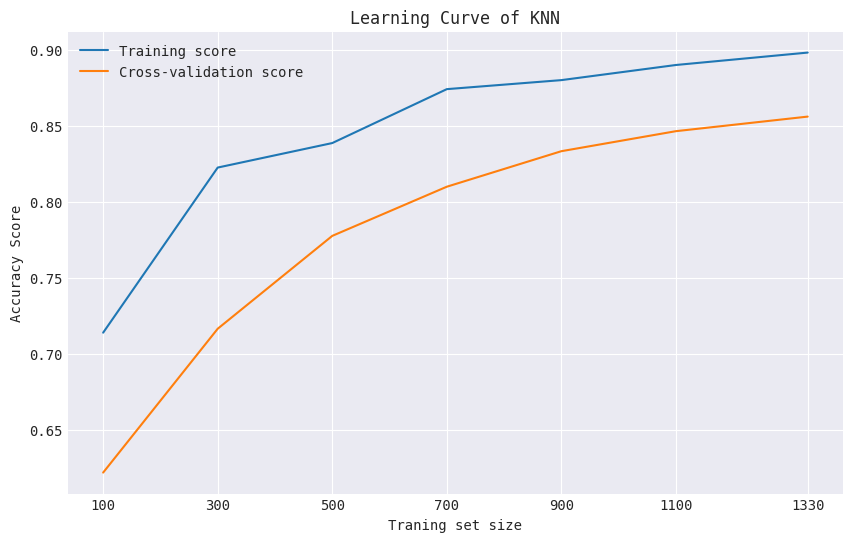

In [49]:
train_sizes, train_scores, valid_scores = learning_curve(knn, X_train, y_train, train_sizes=[100, 300, 500, 700, 900, 1100, 1330], scoring = accuracy_scorer)
plot_learning_curve(train_sizes, train_scores, valid_scores, title = "Learning Curve of KNN", y_label = "Accuracy Score")

<AxesSubplot: >

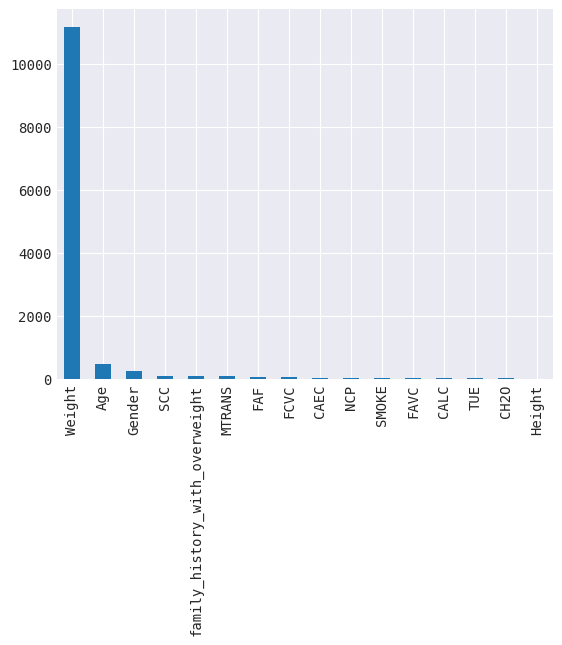

In [50]:
# The higher the chi-square value, the more important the feature is
chi_score = chi2(X_train, y_train)
chi_values = pd.Series(chi_score[0], index=X_train.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

In [51]:
#temporary
k_best = SelectKBest(chi2, k=12)
X_traintemp = k_best.fit_transform(X_train, y_train)
X_testtemp = k_best.transform(X_test)

In [52]:
df_results.style.format({'Training accuracy' : "{:.7}", 'Test accuracy' : "{:.4}"}).set_properties(**{
    'text-align': 'center',
    'white-space': 'pre-wrap',}).set_table_styles([dict(selector="th", props=[("font-size", "100%"),
                               ("text-align", "center")])])

,Model,Parameter,Training accuracy,Test accuracy,Evaluation techniques
0,Logistic Regression,max_iter = 10000,0.85,0.82,Stratified sampling
1,Decision Tree,None,1.0,0.93,Stratified sampling
2,Random Forest,None,1.0,0.95,Stratified sampling
3,SVM,None,0.54,0.54,Stratified sampling
4,XGBoost,None,1.0,0.98,Stratified sampling
5,K-Nearest Neighbors,None,0.91,0.89,Stratified sampling
